# COMPARING MY AMERICAN VS GERMAN TWITTER NETWORKS
### VISUALIZING THE DATA

# Step 0: 
### Importing libraries and the data:

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn: change palette and style 
sns.set_palette('Set3')
sns.set_style("whitegrid")

# Try different seaborn palette: Set3, cool, winter_r

In [122]:
# Import the english language and german language tweets separately, as well as the combined (processed) df:
tweets_en = pd.read_csv('tweets_en.csv')
tweets_de = pd.read_csv('tweets_de.csv')
tweets_analysis = pd.read_csv('tweets_analysis.csv')

In [123]:
tweets_en.drop('Unnamed: 0', axis=1, inplace=True)
tweets_de.drop('Unnamed: 0', axis=1, inplace=True)
tweets_analysis.drop('Unnamed: 0', axis=1, inplace=True)

# Step 1:
### Visualize the polarity of German versus American Network and overall sentiment:

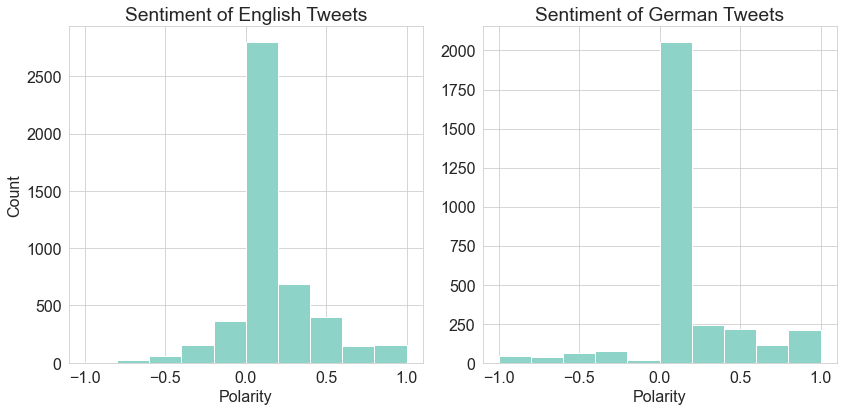

In [124]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.hist(tweets_en['Polarity'], edgecolor='white')
ax1.set_xlabel('Polarity')
ax1.set_ylabel('Count')
ax1.set_title('Sentiment of English Tweets')
ax2.hist(tweets_de['Polarity'], edgecolor='white')
ax2.set_xlabel('Polarity')
ax2.set_title('Sentiment of German Tweets')

plt.tight_layout()
# plt.savefig()
plt.show()

#### Remove middle polarity values and visualize just extremes to compare:

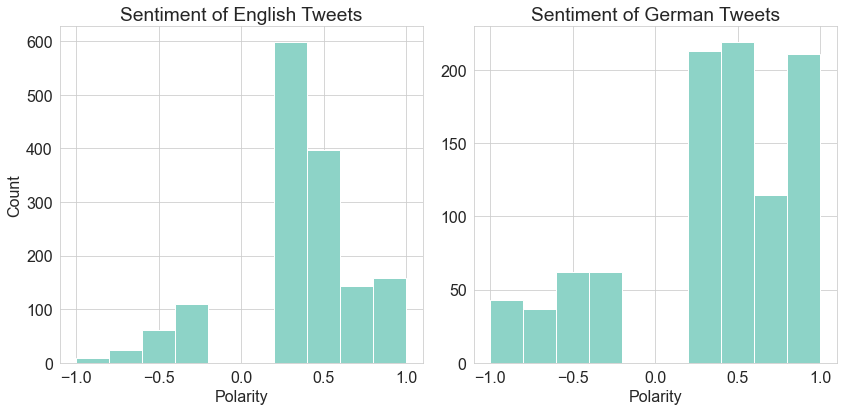

In [125]:
pol_extremes_en = tweets_en[(tweets_en['Polarity'] <= -0.25)|(tweets_en['Polarity'] >= 0.25)]
pol_extremes_de = tweets_de[(tweets_de['Polarity'] <= -0.25)|(tweets_de['Polarity'] >= 0.25)]


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.hist(pol_extremes_en['Polarity'], edgecolor='white')
ax1.set_xlabel('Polarity')
ax1.set_ylabel('Count')
ax1.set_title('Sentiment of English Tweets')
ax2.hist(pol_extremes_de['Polarity'], edgecolor='white')
ax2.set_xlabel('Polarity')
ax2.set_title('Sentiment of German Tweets')

plt.tight_layout()
plt.savefig('polarity_by_country.png')
plt.show()

# Step 2:
### Compare the general sentiment of tweets from German versus American network:

Remember: There are more tweets from German network than from the American network. Find the ratio of each sentiment from all tweets from that region, and compare the ratio rather than absolute tweets. 

Get the probability (predict_proba) of being positive (and compare probabilities from German or American network). 

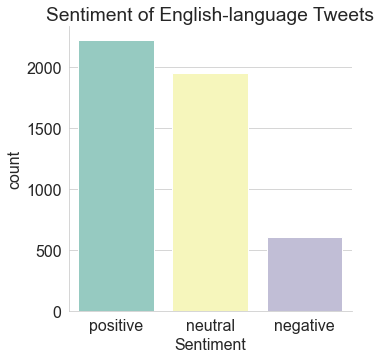

In [126]:
sns.catplot(x='Sentiment', kind='count', data=tweets_en, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment of English-language Tweets')
plt.savefig('sentiment_en_tweets.png')
plt.show()

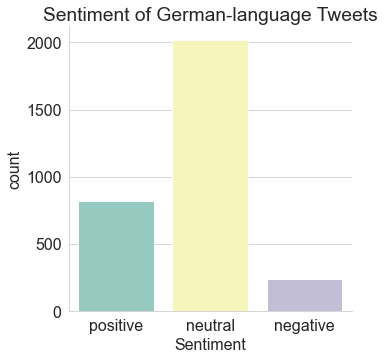

In [127]:
sns.catplot(x='Sentiment', kind='count', data=tweets_de, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment of German-language Tweets')
plt.savefig('sentiment_de_tweets.png')
plt.show()

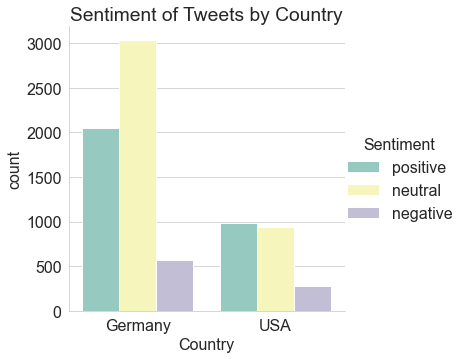

In [128]:
sns.catplot(x='Country', kind='count', hue='Sentiment', data=tweets_analysis)
plt.title('Sentiment of Tweets by Country')
plt.savefig('sentiment_by_country.png')
plt.show()

#### But take into consideration that the absolute values will be off because there are so many more tweets from `['Country']='Germany'`

In [129]:
ger = tweets_analysis[tweets_analysis['Country']=='Germany']
print("Tweets from German Network: ", len(ger))

usa = tweets_analysis[tweets_analysis['Country']=='USA']
print("Tweets from American Network: ", len(usa))

Tweets from German Network:  5659
Tweets from American Network:  2200


In [130]:
ratio_us_pos = len(tweets_analysis[(tweets_analysis['Country']=='USA') & (tweets_analysis['Sentiment']=='positive')])/len(usa)
ratio_us_pos

0.4495454545454545

In [131]:
ratio_de_pos = len(tweets_analysis[(tweets_analysis['Country']=='Germany') & (tweets_analysis['Sentiment']=='positive')])/len(ger)
ratio_de_pos

0.36296165400247393

In [132]:
# How to visualize the ration instead of absolute # of tweets???
# bar chart, but instead of the bars being count of each sentiment, each bar is the count of each sentiment over the total number of tweets (of that lang) in the df. Make new column?

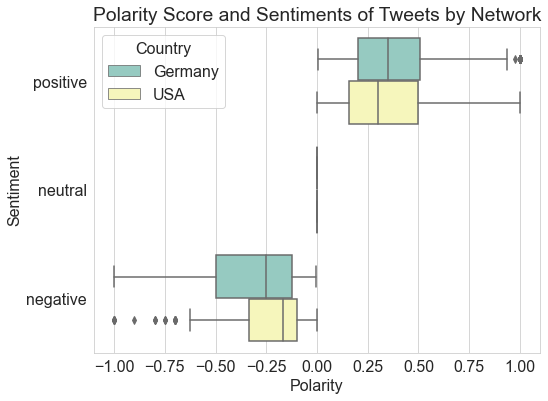

In [133]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Polarity', y='Sentiment', data=tweets_analysis, hue='Country')
plt.title('Polarity Score and Sentiments of Tweets by Network')
plt.savefig('polarity_by_country_boxchart.png')
plt.show()

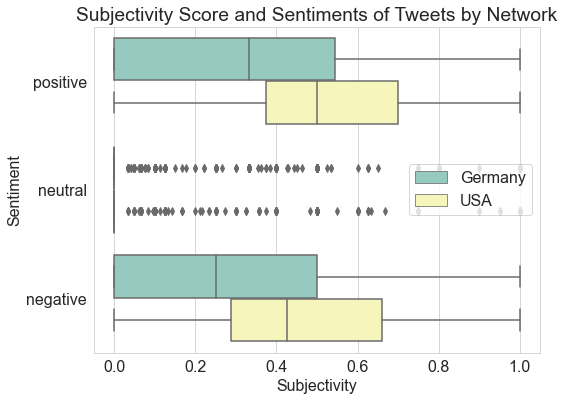

In [134]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Subjectivity', y='Sentiment', data=tweets_analysis, hue='Country')
plt.title('Subjectivity Score and Sentiments of Tweets by Network')
plt.legend(loc='center right')
plt.savefig('subjectivity_by_country_boxchart.png')
plt.show()